In [16]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.models import load_model

In [2]:
IMAGE_WIDTH=150
IMAGE_HEIGHT=50
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3 # color or gray
batch_size= 20

In [3]:
# IMAGE_WIDTH=80
# IMAGE_HEIGHT=24
# IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
# IMAGE_CHANNELS = 3 # color or gray
# # batch_size= 10

In [4]:
categories=[]
train_dir=os.listdir("eyes_test_real/eyes_test_origin/total_augmented")
for filename in train_dir:
    category=filename.split(' ')[0]
    if category == 'bonghwang':
        categories.append('bonghwang')
    if category == 'dohwa':
        categories.append('dohwa')
    if category == 'gongjak':
        categories.append('gongjak')
    if category == 'horang':
        categories.append('horang')
    if category == 'so':
        categories.append('so')
    if category == 'yong':
        categories.append('yong')

In [5]:
df=pd.DataFrame({'filename':train_dir,'category':categories})
df

,filename,category
0,bonghwang 100_0.jpg,bonghwang
1,bonghwang 100_1.jpg,bonghwang
2,bonghwang 100_10.jpg,bonghwang
3,bonghwang 100_11.jpg,bonghwang
4,bonghwang 100_12.jpg,bonghwang
...,...,...
35315,yong 9_5.jpg,yong
35316,yong 9_6.jpg,yong
35317,yong 9_7.jpg,yong
35318,yong 9_8.jpg,yong


In [6]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=777)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

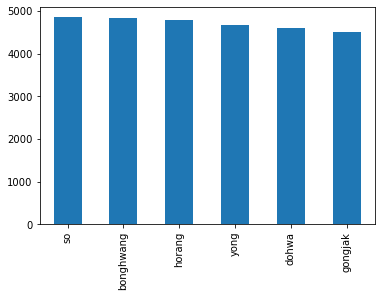

In [7]:
train_df['category'].value_counts().plot.bar()

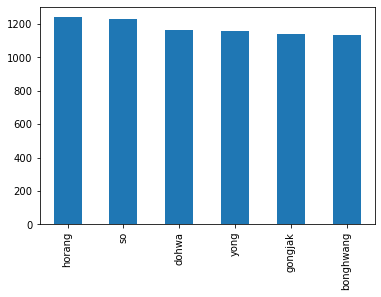

In [8]:
validate_df['category'].value_counts().plot.bar()

In [9]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]


In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator=train_datagen.flow_from_dataframe(train_df,
                                 'eyes_test_real/eyes_test_origin/total_augmented',
                                 x_col='filename',
                                 y_col='category',
                                  target_size=IMAGE_SIZE,
                                  class_mode='categorical',
                                  batch_size=batch_size
                                 )

Found 28256 validated image filenames belonging to 6 classes.


In [12]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                              "eyes_test_real/eyes_test_origin/total_augmented",
                                                              x_col='filename',
                                                              y_col='category',
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='categorical',
                                                              batch_size=batch_size)

Found 7064 validated image filenames belonging to 6 classes.


In [13]:
from keras.models import Sequential
from keras.layers import *

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 48, 32)       896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 48, 32)       128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 22, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 22, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 11, 64)        0

In [17]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [18]:
earlystop = EarlyStopping(patience=5),
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           patience=2,
                                           verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [19]:
history = model.fit_generator(train_generator,
                              epochs=40,
                              validation_data=validation_generator,
                              validation_steps=total_validate//batch_size,
                              steps_per_epoch=total_train//batch_size,
                              callbacks=[earlystop,learning_rate_reduction])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
1412/1412 [==============================] - 298s 211ms/step - loss: 1.8876 - acc: 0.2944 - val_loss: 1.8260 - val_acc: 0.3146
Epoch 2/40
1412/1412 [==============================] - 297s 210ms/step - loss: 1.4306 - acc: 0.4284 - val_loss: 1.5557 - val_acc: 0.3603
Epoch 3/40
1412/1412 [==============================] - 301s 213ms/step - loss: 1.2050 - acc: 0.5299 - val_loss: 1.3629 - val_acc: 0.4758
Epoch 4/40
1412/1412 [==============================] - 307s 218ms/step - loss: 1.0552 - acc: 0.5963 - val_loss: 1.0088 - val_acc: 0.6244
Epoch 5/40
1412/1412 [==============================] - 293s 208ms/step - loss: 0.9834 - acc: 0.6265 - val_loss: 1.0574 - val_acc: 0.6035
Epoch 6/40
1412/1412 [==============================] - ETA: 0s - loss: 0.9213 - acc: 0.6540
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1412/1412 [==============================] - 297s 210ms/step 

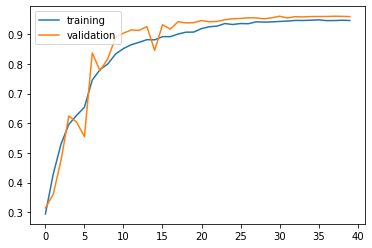

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [21]:
model.evaluate(train_generator)

1413/1413 [==============================] - 40s 28ms/step - loss: 0.0129 - acc: 0.9989


[0.012903915718197823, 0.9988675117492676]

In [22]:
model.save("model_real_new_auged_final.h5")

In [23]:
loaded_model = load_model('model_real_new_auged.h5')

## pretrained model을 통한 예측

### 테스트

In [24]:
categories=[]
train_dir=os.listdir("eyes_test_real/eyes_test_real_test")
for filename in train_dir:
    category=filename.split(' ')[0]
    if category == 'bonghwang':
        categories.append('bonghwang')
    if category == 'dohwa':
        categories.append('dohwa')
    if category == 'gongjak':
        categories.append('gongjak')
    if category == 'horang':
        categories.append('horang')
    if category == 'so':
        categories.append('so')
    if category == 'yong':
        categories.append('yong')

In [25]:
test_df=pd.DataFrame({'filename':train_dir,'category':categories})
test_df

,filename,category
0,bonghwang (1).JPG,bonghwang
1,bonghwang (10).JPG,bonghwang
2,bonghwang (11).JPG,bonghwang
3,bonghwang (12).JPG,bonghwang
4,bonghwang (13).jpg,bonghwang
5,bonghwang (2).JPG,bonghwang
6,bonghwang (3).JPG,bonghwang
7,bonghwang (4).JPG,bonghwang
8,bonghwang (5).JPG,bonghwang
9,bonghwang (6).JPG,bonghwang


In [26]:
nb_samples = test_df.shape[0]
test_gen = ImageDataGenerator(rescale=1./255)

In [27]:
test_generator = test_gen.flow_from_dataframe(test_df,
                                              "eyes_test_real/eyes_test_real_test",
                                              x_col='filename',
                                              y_col=None,
                                              class_mode=None,
                                              target_size=IMAGE_SIZE,
                                              batch_size=batch_size,
                                              shuffle=False)

Found 32 validated image filenames.


In [28]:
predict = loaded_model.predict_generator(test_generator,steps=np.ceil(nb_samples/batch_size))

Instructions for updating:
Please use Model.predict, which supports generators.


In [29]:
print(train_generator.class_indices)
print(predict)

{'bonghwang': 0, 'dohwa': 1, 'gongjak': 2, 'horang': 3, 'so': 4, 'yong': 5}
[[4.80460403e-05 6.64030850e-01 3.76975481e-06 2.14910880e-02
  3.14419955e-01 6.26252313e-06]
 [7.32635863e-06 1.05963345e-03 3.11192707e-06 1.31709445e-02
  9.85759020e-01 1.34807685e-08]
 [6.49386211e-10 4.97188375e-05 2.15329568e-08 7.69115210e-01
  2.30835035e-01 5.54571888e-10]
 [3.96978918e-13 4.49804202e-06 1.92145436e-07 3.72225404e-01
  6.27769887e-01 1.61287567e-10]
 [4.80460403e-05 6.64030850e-01 3.76975481e-06 2.14910880e-02
  3.14419955e-01 6.26252313e-06]
 [5.53948348e-06 7.20551610e-02 1.46337726e-07 2.01092684e-03
  9.25927103e-01 1.12901989e-06]
 [6.67782185e-09 1.57406405e-01 1.64766135e-07 8.32245588e-01
  1.03476299e-02 1.04181041e-07]
 [4.32419611e-09 3.50929573e-02 1.68650105e-09 9.64040697e-01
  8.66317831e-04 7.23652527e-10]
 [8.39422967e-08 2.33674183e-01 6.39283883e-07 4.08727974e-01
  3.57596636e-01 4.96553241e-07]
 [5.18424343e-08 1.50012583e-01 1.78611117e-06 5.01965344e-01
  3.480

In [30]:
test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df

,filename,category
0,bonghwang (1).JPG,dohwa
1,bonghwang (10).JPG,so
2,bonghwang (11).JPG,horang
3,bonghwang (12).JPG,so
4,bonghwang (13).jpg,dohwa
5,bonghwang (2).JPG,so
6,bonghwang (3).JPG,horang
7,bonghwang (4).JPG,horang
8,bonghwang (5).JPG,horang
9,bonghwang (6).JPG,horang


In [ ]:
predict.

In [31]:
import tensorflow as tf

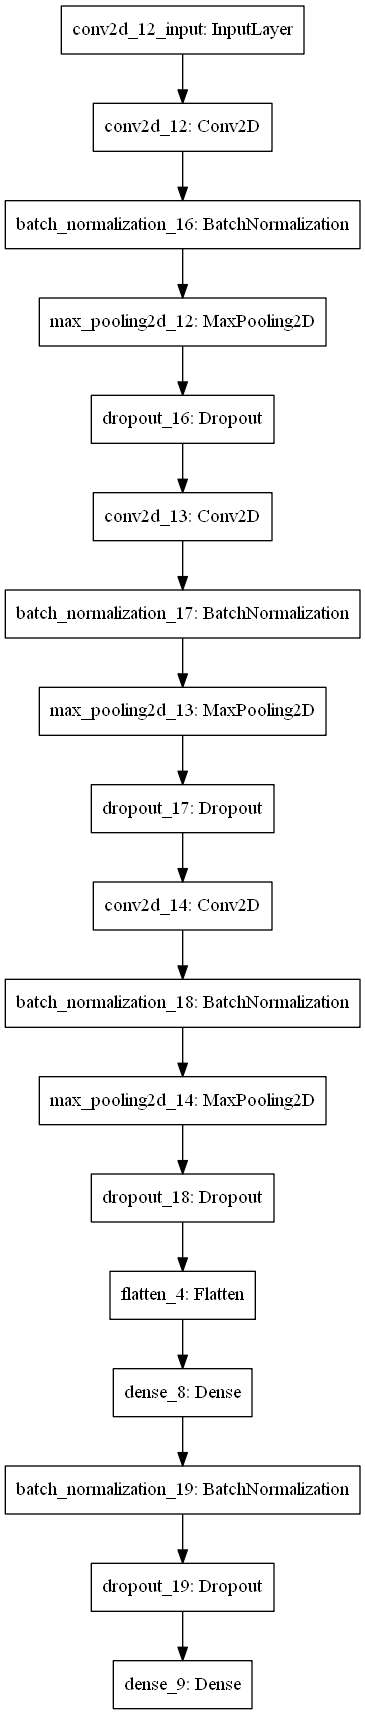

In [32]:
tf.keras.utils.plot_model(
    loaded_model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [33]:
input = tf.keras.Input(shape=(100,), dtype='int32', name='input')
x = tf.keras.layers.Embedding(
    output_dim=512, input_dim=10000, input_length=100)(input)
x = tf.keras.layers.LSTM(32)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)
model = tf.keras.Model(inputs=[input], outputs=[output])
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/model_1.png'